In [2]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


# Splitting the data into traning and testing set

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("../week2_numpy_pandas/data/titanic.csv")

# Split into train and test
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Check shapes
print("Train:", train_df.shape)
print("Test:", test_df.shape)

Train: (623, 12)
Test: (268, 12)


# Manual confusion matrix calculation

In [8]:
TP, FP, FN, TN = 30, 10, 5, 55

accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.85
Precision: 0.75
Recall: 0.86
F1 Score: 0.80


# Visualizing confusion matrix

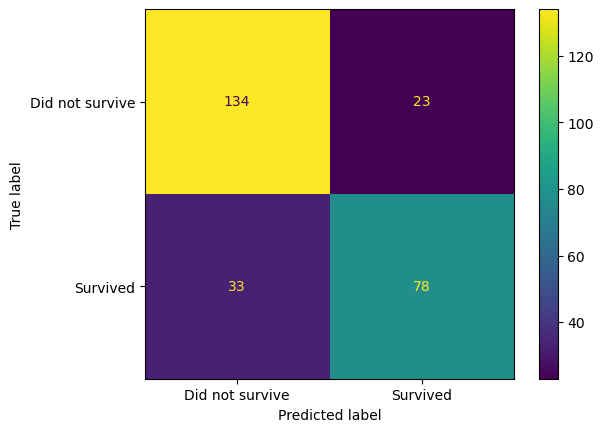

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Simple prediction: predict all females survived
y_true = test_df['Survived']
y_pred = test_df['Sex'].map(lambda x: 1 if x == 'female' else 0)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive', 'Survived'])
disp.plot()

# Validate metrics with sklearn

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))

Accuracy: 0.7910447761194029
Precision: 0.7722772277227723
Recall: 0.7027027027027027
F1 Score: 0.7358490566037735


# Bias vs Variance

Bias and Variance help us understand a model’s prediction errors and guide us in choosing and tuning models.
Bias measures how much a model’s predictions differ from the actual values — high bias means the model is too simple and underfits the data.
Variance measures how much the model’s predictions change when using different training data — high variance means the model is too complex and overfits the training data but may fail on new data.
For example, predicting survival using only gender may have high bias, while using too many features with a small dataset may have high variance.

# Precision vs Recall

Precision and Recall help us understand the quality of a classifier’s positive predictions.
Precision is the percentage of predicted positives that are actually correct — high precision means few false positives.
Recall is the percentage of actual positives that are correctly identified — high recall means few false negatives.
Example:
For a cancer screening test, we usually care more about high recall — we want to catch as many true cancer cases as possible, even if it means some false alarms.
For a spam filter, we may care more about high precision — we don’t want to accidentally mark legitimate emails as spam.
Depending on the problem, we prioritize precision or recall to balance false positives vs false negatives.
For Titanic, you could say: If we over-predict survival (false positives), precision drops. If we miss actual survivors, recall drops.